In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Headers

import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally

#import healpy as hp

import os

from scipy.optimize import curve_fit
import pandas as pd
pd.set_option('precision', 12)

In [3]:
# can also be done just by reading the normal txt file instead of the fits file

NSIDE = 2048

#print('Pixel scale [arcmins] = ', np.sqrt(hp.nside2pixarea(NSIDE, degrees = True)*3600))

In [4]:
# Phase unwrapping in 1D (same results with numpy.unwrap)

def unwrap_1D(xw):
    xu = xw.copy()
    if len(xw) < 2:
        return xu

    for i in range(1, len(xu)):
        diff = xu[i] - xu[i - 1]
        if diff > np.pi:
            xu[i:] = xu[i:] - 2*np.pi
        elif diff < -np.pi:
            xu[i:] = xu[i:] + 2*np.pi
    return xu

# Phase correlations and order parameter

## Gaussian map

In [5]:
map_idx = 1
filepath_gaussian = './simulations_output/gaussian_maps/'

In [6]:
df_alm = pd.read_csv(filepath_gaussian+'/recov_alm_'+str(map_idx)+'.dat',
                 names=['l', 'm', 'f1z1Re', 'f1z1Im'],
                 dtype={'l': 'int', 'm' : 'int', 'f1z1Re': 'float64', 'f1z1Im' : 'float64'},
                 sep="\s+", #separator whitespace
                 skiprows=[0,1])
df_cls = pd.read_csv(filepath_gaussian+'/recovCls_'+str(map_idx)+'.dat',
                 names=['l', 'Cl-f1z1f1z1'],
                 dtype={'l' : 'int', 'f1z1f1z1' : 'float64'},
                 sep="\s+", #separator whitespace
                 skiprows=[0])

/home/anik/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/anik/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


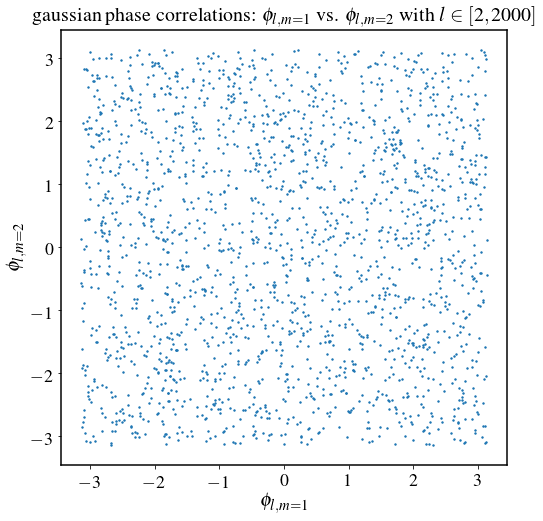

In [7]:
select_m_1 = df_alm['m'] == 1
deselect_l_1 = df_alm['l'] != 1
select_m_2 = df_alm['m'] == 2
phi_lm_gaussian_x = np.arctan2(df_alm[select_m_1 & deselect_l_1]['f1z1Im'],df_alm[select_m_1 & deselect_l_1]['f1z1Re'])
phi_lm_gaussian_y = np.arctan2(df_alm[select_m_2]['f1z1Im'],df_alm[select_m_2]['f1z1Re'])

plt.figure(figsize=(8,8))
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)

plt.scatter(phi_lm_gaussian_x, phi_lm_gaussian_y, s=2)
plt.xlabel('$\phi_{l,m=1}$',fontsize=20)
plt.ylabel('$\phi_{l,m=2}$',fontsize=20)
plt.title('gaussian phase correlations: $\phi_{l,m=1}$ vs. $\phi_{l,m=2}$ with $l \in [2,2000]$', fontsize=20)
plt.savefig('./plots_unwrapping/phase_correlations_gaussian_'+str(map_idx)+'.png')

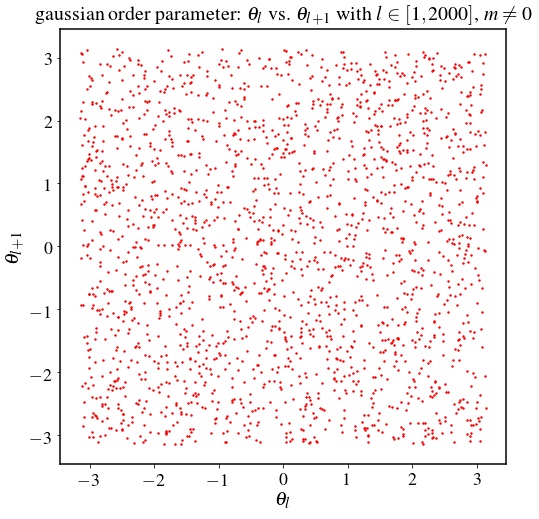

In [8]:
l_values = df_cls['l']
order_parameter_l_Re_gaussian = np.zeros(len(l_values), dtype=np.float64)
order_parameter_l_Im_gaussian = np.zeros(len(l_values), dtype=np.float64)
for l in l_values:
    l_mask = df_alm['l'] == l
    zero_mask = df_alm['m'] != 0
    order_parameter_l_Re_gaussian[l - 1] = df_alm[l_mask & zero_mask]['f1z1Re'].sum()
    order_parameter_l_Im_gaussian[l - 1] = df_alm[l_mask & zero_mask]['f1z1Im'].sum()
order_parameter_l_phi_gaussian = np.arctan2(order_parameter_l_Im_gaussian, order_parameter_l_Re_gaussian)

plt.figure(figsize=(8,8))
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)

plt.scatter(order_parameter_l_phi_gaussian[:-1],order_parameter_l_phi_gaussian[1:], s=2, c='r')
plt.xlabel('$\\theta_{l}$',fontsize=20)
plt.ylabel('$\\theta_{l+1}$',fontsize=20)
plt.title('gaussian order parameter: $\\theta_{l}$ vs. $\\theta_{l+1}$ with $l \\in [1,2000]$, $m\\neq0$', fontsize=20)
plt.savefig('./plots_unwrapping/order_parameter_correlations_gaussian_'+str(map_idx)+'.png')

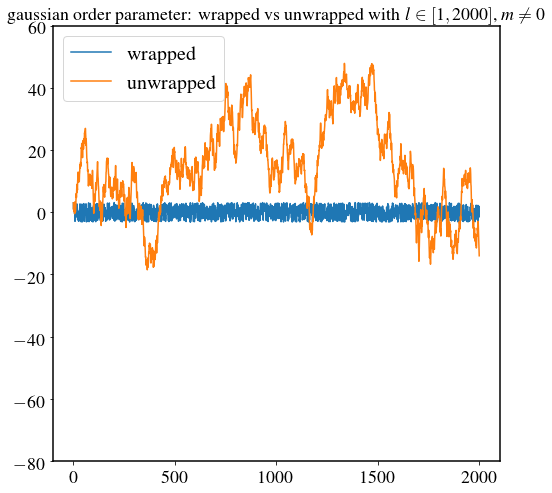

In [9]:
plt.figure(figsize=(8,8))
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)

plt.plot(l_values, order_parameter_l_phi_gaussian, label="wrapped")
order_parameter_l_phi_gaussian_unwrapped = unwrap_1D(order_parameter_l_phi_gaussian)
order_parameter_l_phi_gaussian_unwrapped_numpy = np.unwrap(order_parameter_l_phi_gaussian)

plt.plot(l_values, order_parameter_l_phi_gaussian_unwrapped, label="unwrapped")
#plt.plot(l_values, order_parameter_l_phi_gaussian_unwrapped_numpy, label="unwrapped numpy")

plt.title('gaussian order parameter: wrapped vs unwrapped with $l \in [1,2000]$, $m\\neq0$', fontsize=18)
plt.ylim((-80, 60))
plt.legend(fontsize=20)
plt.savefig('./plots_unwrapping/order_parameter_phase_unwrapping_gaussian_'+str(map_idx)+'.png')

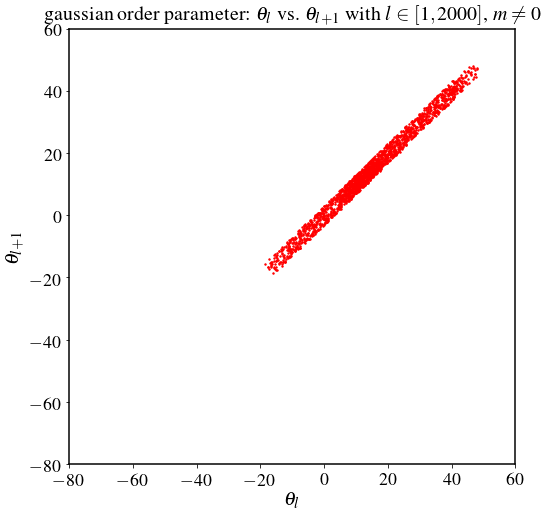

In [10]:
plt.figure(figsize=(8,8))
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)

plt.scatter(order_parameter_l_phi_gaussian_unwrapped[:-1],order_parameter_l_phi_gaussian_unwrapped[1:], s=2, c='r')
plt.xlabel('$\\theta_{l}$',fontsize=20)
plt.ylabel('$\\theta_{l+1}$',fontsize=20)
plt.title('gaussian order parameter: $\\theta_{l}$ vs. $\\theta_{l+1}$ with $l \\in [1,2000]$, $m\\neq0$', fontsize=20)
plt.xlim((-80, 60))
plt.ylim((-80, 60))
plt.savefig('./plots_unwrapping/order_parameter_correlations_unwrapped_gaussian_'+str(map_idx)+'.png')

## Lognormal map

In [11]:
logshift = 1.0
filepath_lognormal = './simulations_output/lognormal_maps/logshift_'+str(logshift)+'/'

In [12]:
df_log_alm = pd.read_csv(filepath_lognormal+'/recov_alm_'+str(map_idx)+'.dat',
                 names=['l', 'm', 'f1z1Re', 'f1z1Im'],
                 dtype={'l': 'int', 'm' : 'int', 'f1z1Re': 'float64', 'f1z1Im' : 'float64'},
                 sep="\s+", #separator whitespace
                 skiprows=[0,1])
df_log_cls = pd.read_csv(filepath_lognormal+'/recovCls_'+str(map_idx)+'.dat',
                 names=['l', 'Cl-f1z1f1z1'],
                 dtype={'l' : 'int', 'f1z1f1z1' : 'float64'},
                 sep="\s+", #separator whitespace
                 skiprows=[0])

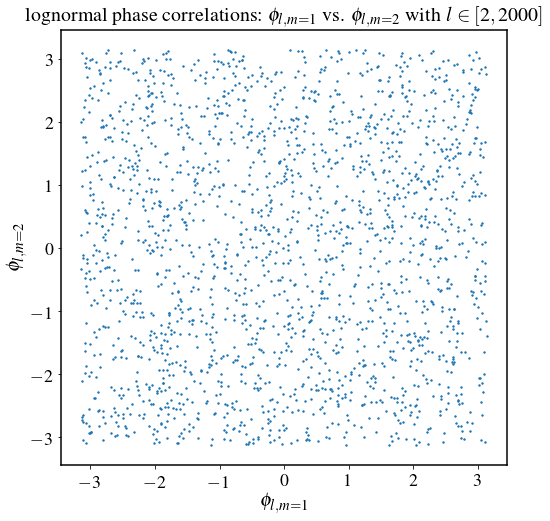

In [13]:
select_log_m_1 = df_log_alm['m'] == 1
deselect_log_l_1 = df_log_alm['l'] != 1
select_log_m_2 = df_log_alm['m'] == 2
phi_lm_log_x = np.arctan2(df_log_alm[select_log_m_1 & deselect_log_l_1]['f1z1Im'],df_log_alm[select_log_m_1 & deselect_log_l_1]['f1z1Re'])
phi_lm_log_y = np.arctan2(df_log_alm[select_log_m_2]['f1z1Im'],df_log_alm[select_log_m_2]['f1z1Re'])

plt.figure(figsize=(8,8))
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)

plt.scatter(phi_lm_log_x, phi_lm_log_y, s=2)
plt.xlabel('$\phi_{l,m=1}$',fontsize=20)
plt.ylabel('$\phi_{l,m=2}$',fontsize=20)
plt.title('lognormal phase correlations: $\phi_{l,m=1}$ vs. $\phi_{l,m=2}$ with $l \in [2,2000]$', fontsize=20)
plt.savefig('./plots_unwrapping/phase_correlations_lognormal_'+str(map_idx)+'.png')

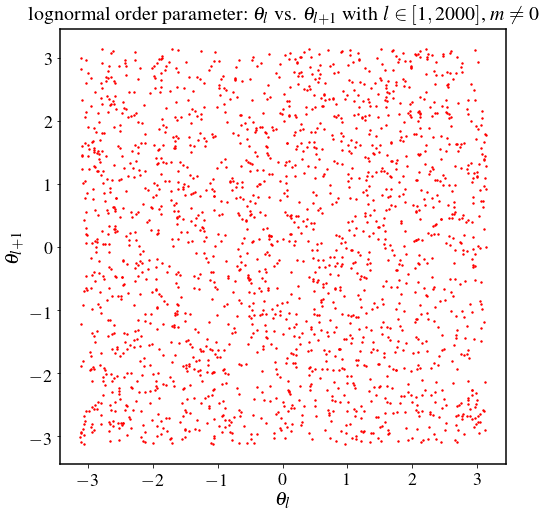

In [14]:
l_log_values = df_log_cls[df_log_cls['l'] > 0]['l']
order_parameter_l_Re_log = np.zeros(len(l_log_values), dtype=np.float64)
order_parameter_l_Im_log = np.zeros(len(l_log_values), dtype=np.float64)
for l in l_log_values:
    l_log_mask = df_log_alm['l'] == l
    l_log_zero_mask = df_log_alm['m'] != 0
    order_parameter_l_Re_log[l - 1] = df_log_alm[l_log_mask & l_log_zero_mask]['f1z1Re'].sum()
    order_parameter_l_Im_log[l - 1] = df_log_alm[l_log_mask & l_log_zero_mask]['f1z1Im'].sum()
order_parameter_l_phi_log = np.arctan2(order_parameter_l_Im_log, order_parameter_l_Re_log)

plt.figure(figsize=(8,8))
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)

plt.scatter(order_parameter_l_phi_log[:-1],order_parameter_l_phi_log[1:], s=2, c='r')
plt.xlabel('$\\theta_{l}$',fontsize=20)
plt.ylabel('$\\theta_{l+1}$',fontsize=20)
plt.title('lognormal order parameter: $\\theta_{l}$ vs. $\\theta_{l+1}$ with $l \\in [1,2000]$, $m\\neq0$', fontsize=20)
plt.savefig('./plots_unwrapping/order_parameter_correlations_lognormal_'+str(map_idx)+'.png')

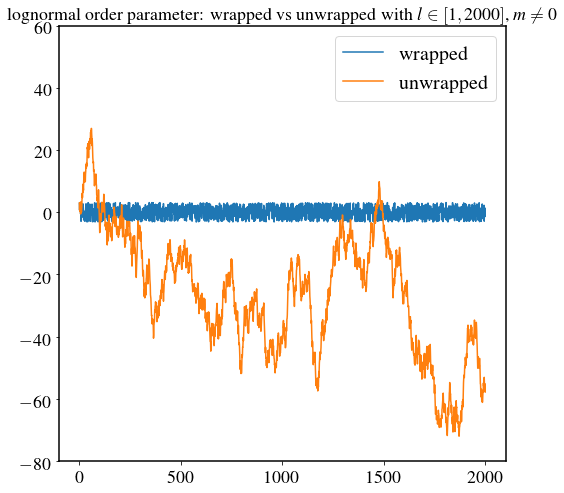

In [15]:
plt.figure(figsize=(8,8))
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)

plt.plot(l_log_values, order_parameter_l_phi_log, label="wrapped")
order_parameter_l_phi_log_unwrapped = unwrap_1D(order_parameter_l_phi_log)
order_parameter_l_phi_log_unwrapped_numpy = np.unwrap(order_parameter_l_phi_log)

plt.plot(l_log_values, order_parameter_l_phi_log_unwrapped, label="unwrapped")
#plt.plot(l_log_values, order_parameter_l_phi_log_unwrapped_numpy, label="unwrapped numpy")
plt.title('lognormal order parameter: wrapped vs unwrapped with $l \\in [1,2000]$, $m\\neq0$', fontsize=18)
plt.ylim((-80, 60))
plt.legend(fontsize=20)
plt.savefig('./plots_unwrapping/order_parameter_phase_unwrapping_lognormal_'+str(map_idx)+'.png')

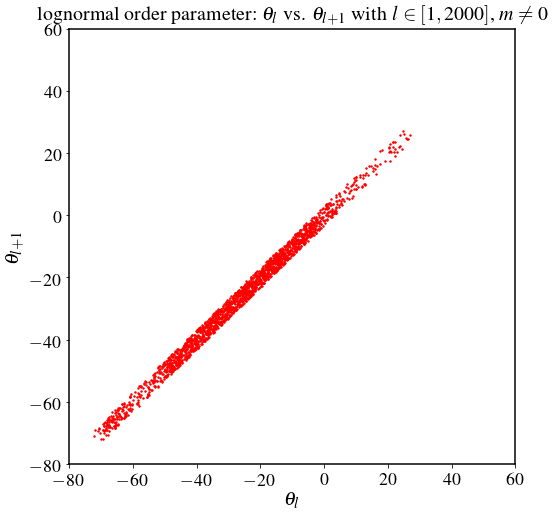

In [16]:
plt.figure(figsize=(8,8))
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)

plt.scatter(order_parameter_l_phi_log_unwrapped[:-1],order_parameter_l_phi_log_unwrapped[1:], s=2, c='r')
plt.xlabel('$\\theta_{l}$',fontsize=20)
plt.ylabel('$\\theta_{l+1}$',fontsize=20)
plt.title('lognormal order parameter: $\\theta_{l}$ vs. $\\theta_{l+1}$ with $l \\in [1,2000]$, $m\\neq0$', fontsize=20)
plt.xlim((-80, 60))
plt.ylim((-80, 60))
plt.savefig('./plots_unwrapping/order_parameter_correlations_unwrapped_lognormal_'+str(map_idx)+'.png')

## Comparison of phase correlations : Gaussian and lognormal

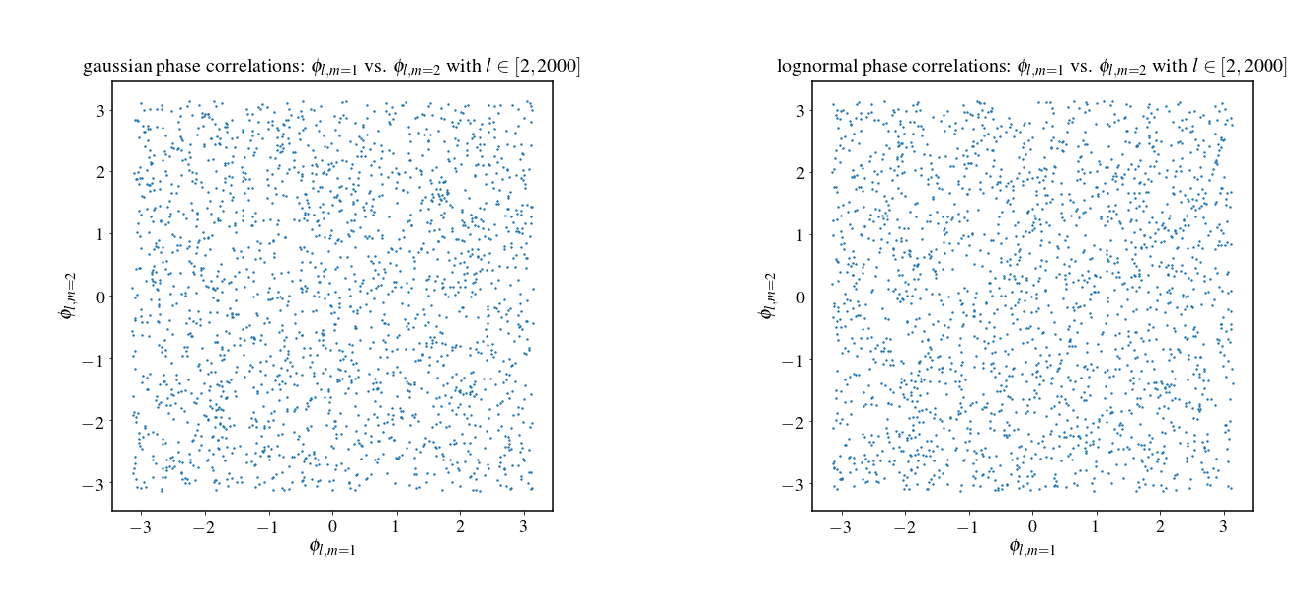

In [17]:
images = []
images.append(mpimg.imread('plots_unwrapping/phase_correlations_gaussian_'+str(map_idx)+'.png'))
images.append(mpimg.imread('plots_unwrapping/phase_correlations_lognormal_'+str(map_idx)+'.png'))

plt.figure(figsize=(23,23))
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

## Comparison of order parameter : Gaussian and lognormal

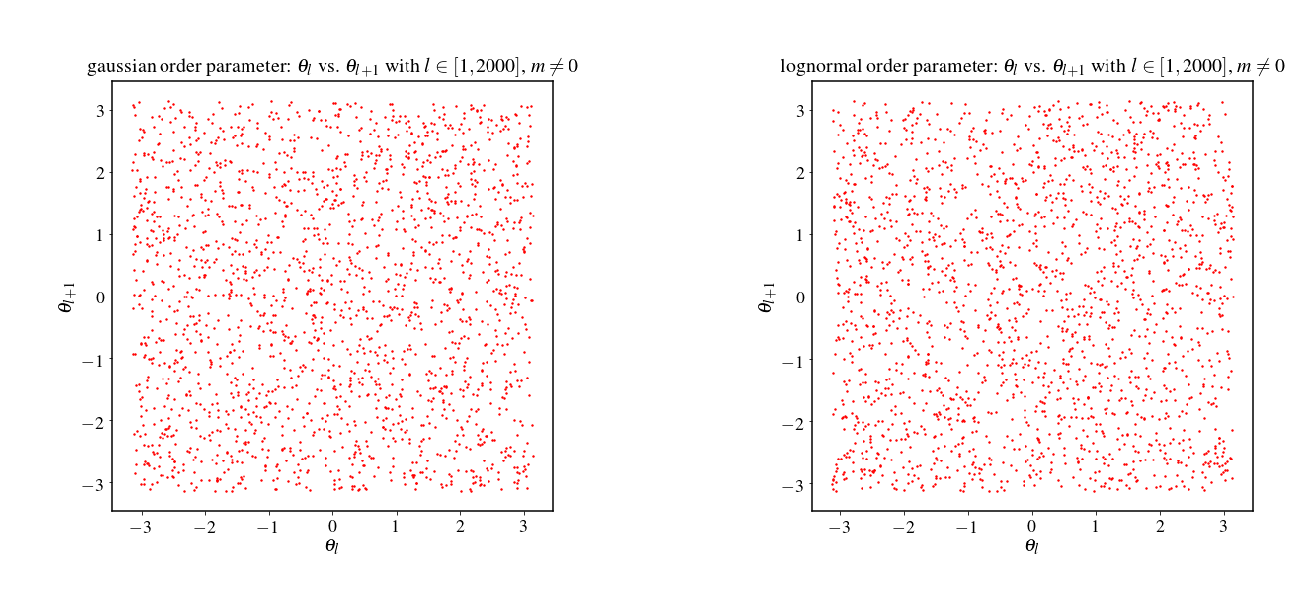

In [18]:
images = []
images.append(mpimg.imread('plots_unwrapping/order_parameter_correlations_gaussian_'+str(map_idx)+'.png'))
images.append(mpimg.imread('plots_unwrapping/order_parameter_correlations_lognormal_'+str(map_idx)+'.png'))

plt.figure(figsize=(23,23))
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

## Comparison of unwrapped phases: Gaussian and lognormal

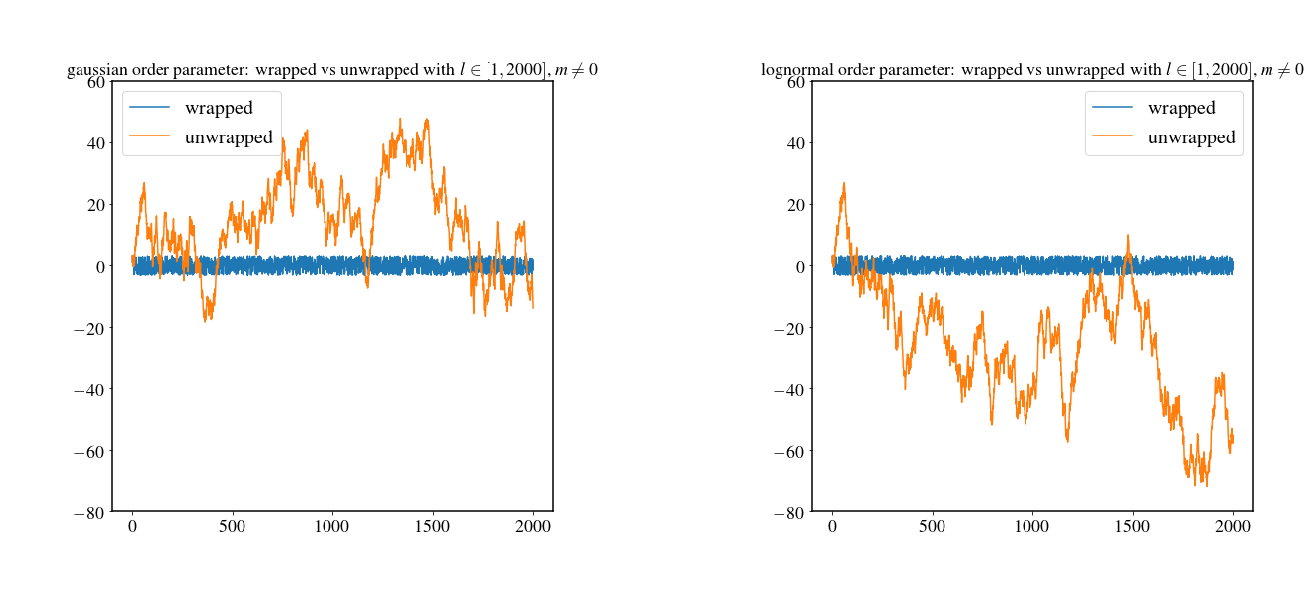

In [19]:
images = []
images.append(mpimg.imread('plots_unwrapping/order_parameter_phase_unwrapping_gaussian_'+str(map_idx)+'.png'))
images.append(mpimg.imread('plots_unwrapping/order_parameter_phase_unwrapping_lognormal_'+str(map_idx)+'.png'))

plt.figure(figsize=(23,23))
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

## Comparison of order parameter for unwrapped phase: Gaussian and lognormal

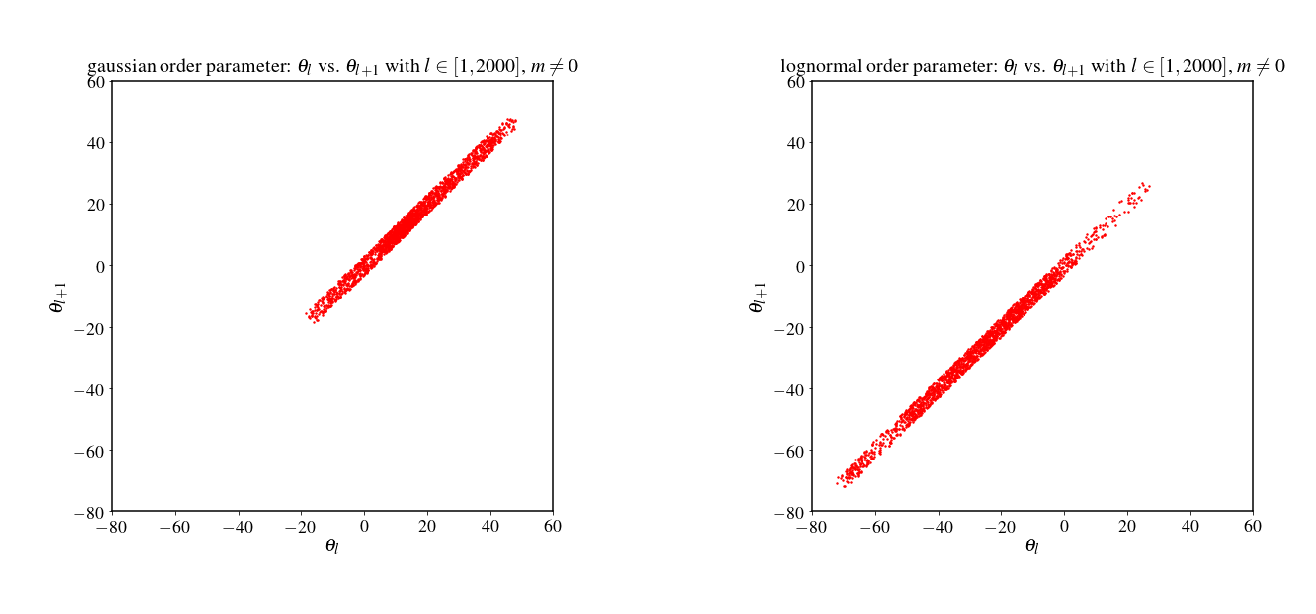

In [20]:
images = []
images.append(mpimg.imread('plots_unwrapping/order_parameter_correlations_unwrapped_gaussian_'+str(map_idx)+'.png'))
images.append(mpimg.imread('plots_unwrapping/order_parameter_correlations_unwrapped_lognormal_'+str(map_idx)+'.png'))

plt.figure(figsize=(23,23))
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)